Saving data.xlsx to data (9).xlsx

Deviation between Original Marks and Model Marks:
    id no  model 1  model 2  model 3  model 4  model 5
0       1      1.0      1.0      1.0      1.0      1.0
1       2      1.5      2.0      1.5      0.0      1.0
2       3      1.5      1.0      3.0      2.0      1.0
3       4      0.5      1.0      0.5      1.0      0.0
4       5      0.5      0.0      0.0      1.5      0.0
5       6      1.0      0.5      1.0      0.5      0.0
6       7      1.5      0.0      0.5      1.0      0.0
7       8      3.0      0.5      2.0      2.0      2.5
8       9      0.5      1.0      1.0      0.5      0.0
9      10      1.5      2.0      1.0      1.5      0.5
10     11      2.0      0.5      0.0      0.5      0.5
11     12      2.5      2.0      2.5      3.0      3.0
12     13      1.5      1.5      1.0      1.5      1.5
13     14      2.0      1.0      1.0      1.0      1.0
14     15      1.0      2.0      2.0      1.0      2.0
15     16      0.5      0.5      1.

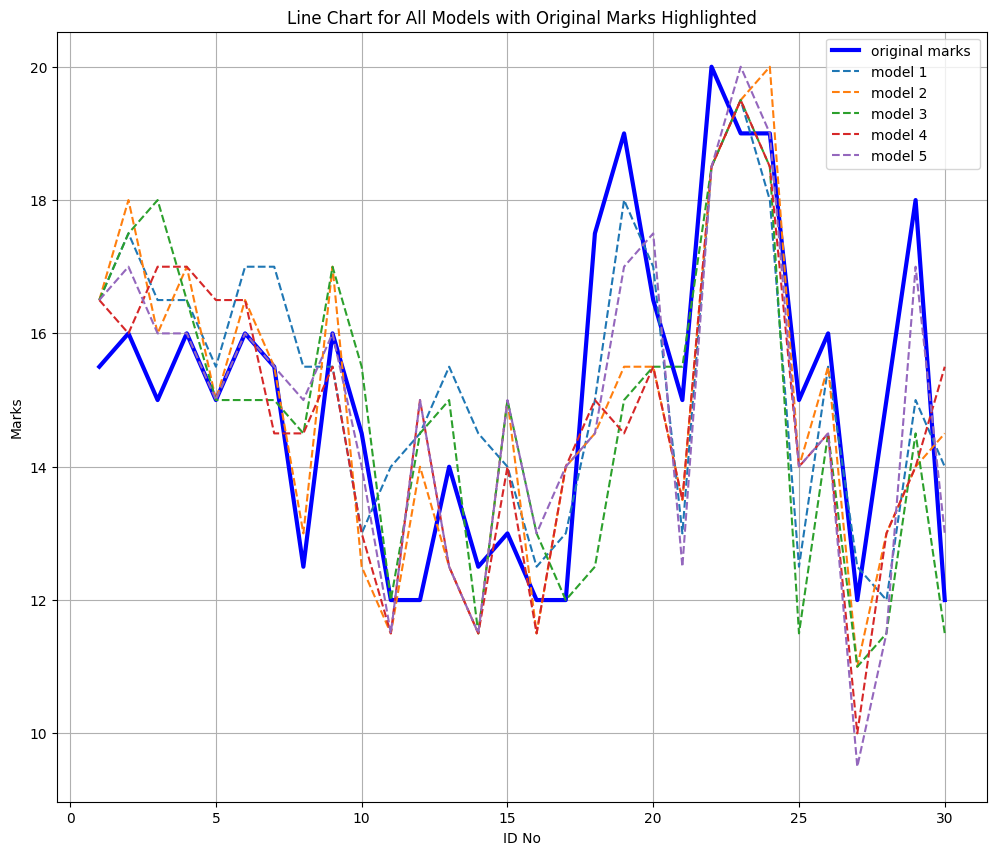

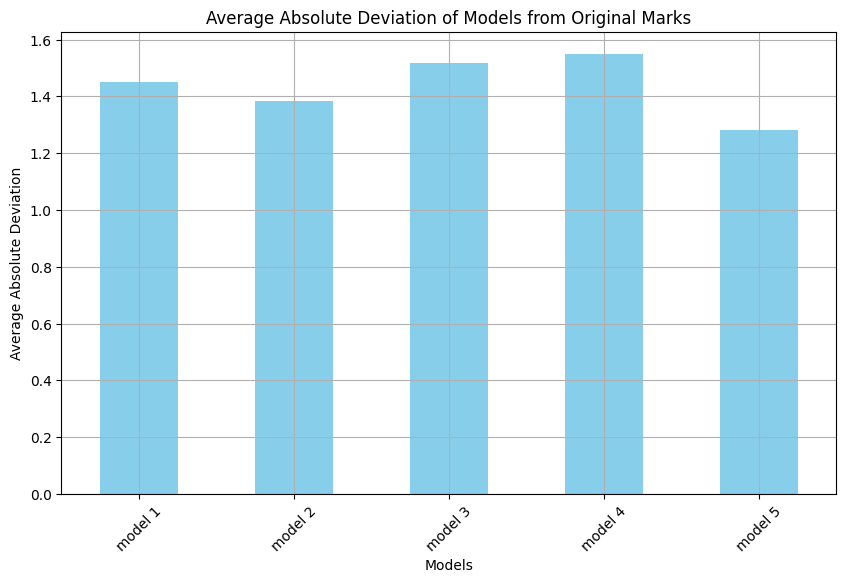


Deviation Table with Best Model Highlighted:


,id no,model 1,model 2,model 3,model 4,model 5
0,1,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,1.500000,2.000000,1.500000,0.000000,1.000000
2,3,1.500000,1.000000,3.000000,2.000000,1.000000
3,4,0.500000,1.000000,0.500000,1.000000,0.000000
4,5,0.500000,0.000000,0.000000,1.500000,0.000000
5,6,1.000000,0.500000,1.000000,0.500000,0.000000
6,7,1.500000,0.000000,0.500000,1.000000,0.000000
7,8,3.000000,0.500000,2.000000,2.000000,2.500000
8,9,0.500000,1.000000,1.000000,0.500000,0.000000
9,10,1.500000,2.000000,1.000000,1.500000,0.500000



Results exported to 'deviation_table.csv' and 'summary_statistics.csv'.


In [9]:
# Step 1: Install necessary libraries (if not already installed)
!pip install pandas matplotlib plotly

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Step 3: Upload the Excel file to Colab
from google.colab import files
uploaded = files.upload()

# Step 4: Load the Excel file into a DataFrame
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_excel(file_name, sheet_name='Sheet1')  # Load the data

# Step 5: Plot a line chart for all parameters
plt.figure(figsize=(12, 10))  # Set the figure size

# Assuming the first column after 'id no' is the original marks
original_marks_column = df.columns[1]

# Plot each column (except 'id no') as a separate line
for column in df.columns[1:]:
    if column == original_marks_column:
        # Highlight the original marks with a thicker line and different color
        plt.plot(df['id no'], df[column], label=column, linewidth=3, color='blue')
    else:
        plt.plot(df['id no'], df[column], label=column, linestyle='--')

# Add labels and title
plt.xlabel('ID No')
plt.ylabel('Marks')
plt.title('Line Chart for All Models with Original Marks Highlighted')
plt.legend()  # Show legend
plt.grid(True)  # Add grid

# Step 6: Calculate and display the deviation between original marks and model marks
deviations = {}
for column in df.columns[2:]:  # Skip 'id no' and original marks column
    deviations[column] = (df[column] - df[original_marks_column]).abs()  # Absolute deviation

# Create a DataFrame for deviations
deviation_df = pd.DataFrame(deviations)
deviation_df.insert(0, 'id no', df['id no'])  # Insert 'id no' column for reference

# Calculate the average absolute deviation for each model
average_deviations = deviation_df.iloc[:, 1:].mean()

# Find the best model (the one with the smallest average absolute deviation)
best_model = average_deviations.idxmin()
best_model_avg_deviation = average_deviations.min()

# Display the deviation table below the graph
print("\nDeviation between Original Marks and Model Marks:")
print(deviation_df)

# Display the average absolute deviation for all models
print("\nAverage Absolute Deviation for Each Model:")
for model, avg_deviation in average_deviations.items():
    print(f"{model}: {avg_deviation:.2f}")

# Display the best model
print(f"\nBest Model: {best_model} (Average Absolute Deviation: {best_model_avg_deviation:.2f})")

# Step 7: Summary Statistics
print("\nSummary Statistics for Original Marks and Model Marks:")
summary_stats = df.describe()
print(summary_stats)

# Step 8: Correlation Matrix
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Step 9: Deviation Visualization (Bar Chart)
plt.figure(figsize=(10, 6))
average_deviations.plot(kind='bar', color='skyblue')
plt.xlabel('Models')
plt.ylabel('Average Absolute Deviation')
plt.title('Average Absolute Deviation of Models from Original Marks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 10: Highlight Best Model in Deviation Table
deviation_df_styled = deviation_df.style.apply(lambda x: ['background: lightgreen' if x.name == best_model else '' for i in x], axis=1)
print("\nDeviation Table with Best Model Highlighted:")
display(deviation_df_styled)

# Step 11: Export Results to CSV
deviation_df.to_csv('deviation_table.csv', index=False)
summary_stats.to_csv('summary_statistics.csv')
print("\nResults exported to 'deviation_table.csv' and 'summary_statistics.csv'.")

# Step 12: Interactive Plot using Plotly
fig = px.line(df, x='id no', y=df.columns[1:], title='Interactive Line Chart for All Models')
fig.update_traces(line=dict(width=2), selector=dict(name=original_marks_column))
fig.show()